# 1. Importing the data set and libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Mayur\Desktop\DS assignment 2 - ADR Clasification\Data.csv")
df.head()

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1


# 2. Priliminary Analysis on the data

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Class Distribution')

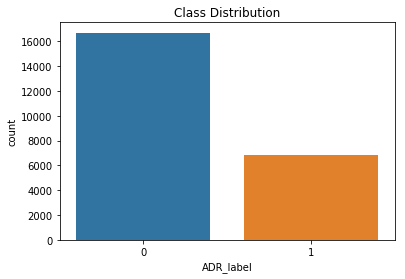

In [5]:
#Frequency plot of classes
print(sns.countplot(df['ADR_label'],label=True))
plt.title('Class Distribution')

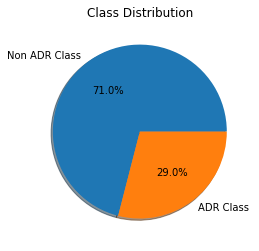

In [53]:
#Visualizing the classes of data
chat_data = df['ADR_label'].value_counts()
plt.pie(chat_data, autopct='%1.1f%%', shadow=True,labels=['Non ADR Class','ADR Class'])
plt.title('Class Distribution');
plt.show()

Conclusion: From the above representation, we can see data is highly unbalanced. The Non ADR class accounts for 71% of data and on other hand ADR class only has 29%

# 3. Data cleaning

In [14]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
Tokenz = WordPunctTokenizer()
Mentions_Removal = r'@[A-Za-z0-9_]+' # removing sinle alphaberts
Http_Removal = r'http(s?)://[^ ]+'   #HttpS_Removalfrom link
Www_Removal = r'www.[^ ]+'           # link removing frong tweet
#Combining the above 3 removals functions
#Combining_MentnHttp = r'|'.join((Mentions_Removal,Http_Removal))
Combining_MentnHttp1 = r'|'.join((Http_Removal,Www_Removal))

In [15]:
#Creating a negation dictionary because words with apostrophe symbol (') will (Can't > can t) 
Negation_Dictonary = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
                "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
                "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
                "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have","they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  
                "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                 "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
Negation_Joining= re.compile(r'\b(' + '|'.join(Negation_Dictonary.keys()) + r')\b')

In [16]:
def clean_tweet_function(text):
    BeautifulSoup_assign = BeautifulSoup(text, 'html.parser')
    Souping = BeautifulSoup_assign.get_text()
    try:
        BOM_removal = Souping.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        BOM_removal = Souping
    Comb_2 = re.sub(Combining_MentnHttp1, '', BOM_removal)
    #Comb_3 = re.sub(Www_Removal,'',Comb_2)
    Comb_3 = re.sub(Mentions_Removal,'',Comb_2)
    LowerCase = Comb_3.lower()
    Negation_Handling = Negation_Joining.sub(lambda x: Negation_Dictonary[x.group()], LowerCase)
    Letters_only = re.sub("[^a-zA-Z]", " ", Negation_Handling)
    
    # Removing unneccessary white- Tokenizing and joining together
    Tokenization = [x for x  in Tokenz.tokenize(Letters_only) if len(x) > 1]
    return (" ".join(Tokenization)).strip()
clean_tweet_function

#Cleaning up the data with step 1
xrange = range #Defining X range

In [17]:
%%time
xrange = range
print ("Cleaning tweets in train data...\n")
clean_tweet_df = []
for i in xrange(0,len(df)):
    if( (i+1)%100000 == 0 ):
        "Reviews %d of %d has been processed".format( i+1, len(df) )  
        
    clean_tweet_df.append(clean_tweet_function(df['Tweet'][i]))
    
#Changing into dataframe
df['cleaned_tweet'] = clean_tweet_df

Cleaning tweets in train data...

Wall time: 6.01 s


In [18]:
#Lets compare the positive tweets before and after cleaning
print('BEFORE - ',df[df['ADR_label']==1]['Tweet'][13])
print('AFTER - ',df[df['ADR_label']==1]['cleaned_tweet'][13])
print('')

print('BEFORE - ',df[df['ADR_label']==1]['Tweet'][77])
print('AFTER - ',df[df['ADR_label']==1]['cleaned_tweet'][77])
print('')
print('BEFORE - ',df[df['ADR_label']==1]['Tweet'][111])
print('AFTER - ',df[df['ADR_label']==1]['cleaned_tweet'][111])

BEFORE -  We describe the side effects of 5-FU in a colon cancer patient who suffered severe mucositis, desquamating dermatitis, prolonged myelosuppression, and neurologic toxicity that required admission to the intensive care unit.
AFTER -  we describe the side effects of fu in colon cancer patient who suffered severe mucositis desquamating dermatitis prolonged myelosuppression and neurologic toxicity that required admission to the intensive care unit

BEFORE -  METHODS: The patient required insulin desensitization for severe urticaria, angioedema, and occasional wheezing resulting from her insulin dose.
AFTER -  methods the patient required insulin desensitization for severe urticaria angioedema and occasional wheezing resulting from her insulin dose

BEFORE -  The association of venlafaxine treatment with ischaemic events could be explained by its unique pharmacological and haemodynamic properties.
AFTER -  the association of venlafaxine treatment with ischaemic events could be expl

In [19]:
#Lets compare the positive tweets before and after cleaning
print('BEFORE - ',df[df['ADR_label']==0]['Tweet'])
print('AFTER - ',df[df['ADR_label']==0]['cleaned_tweet'])
print('')
print('BEFORE - ',df[df['ADR_label']==0]['Tweet'])
print('AFTER - ',df[df['ADR_label']==0]['cleaned_tweet'])
print('')
print('BEFORE - ',df[df['ADR_label']==0]['Tweet'])
print('AFTER - ',df[df['ADR_label']==0]['cleaned_tweet'])

BEFORE -  6822     "Retinoic acid syndrome" was prevented with sh...
6823     BACKGROUND: External beam radiation therapy of...
6824     Although the enuresis ceased, she developed th...
6825     A 42-year-old woman had uneventful bilateral l...
6826     A 16-year-old girl with erosive, polyarticular...
6827     Resection and use of a cyclooxygenase-2 inhibi...
6828     Differences in interpretation by patients and ...
6829     We present a case report of a cytomegalovirus ...
6830     Dihydropyrimidine dehydrogenase (DPD) is the r...
6831     The decedent was also prescribed tramadol, gab...
6832     Magnetic resonance imaging of the spinal cord ...
6833     In this case report we describe the occurrence...
6834     The day after the infusion, she no longer comp...
6835     Acute coronary artery occlusion during percuta...
6836     Examination showed severe dyspnea with severe ...
6837     Approximately 1 year after symptom onset he de...
6838     In those patients who found the comme

3.2 Removing Stopwords

In [20]:
#Importing stop words and removing negative words from it
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english')) - {'no', 'nor', 'not'} #we don't Stopwords to remove negation from our tweets

def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stopwords])

#Removing stop words from Data set
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Creating Word cloud to understand the densities of words. on the basis of the wordcloud we highlight the major words arises on that tweets

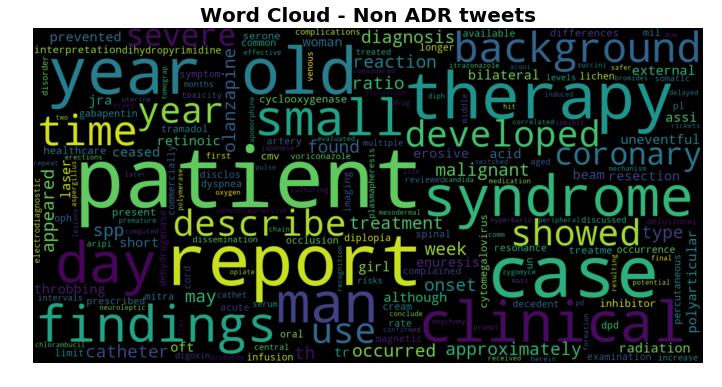

In [73]:
#Word cloud of Non-ADR tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(df[df['ADR_label']==0]['cleaned_tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Non ADR(Adverse Drug Reactions) tweets',fontsize=20,fontweight='bold')
plt.show()

As we see in above Word cloud as per logic there is no any word occure which related to adverse effect

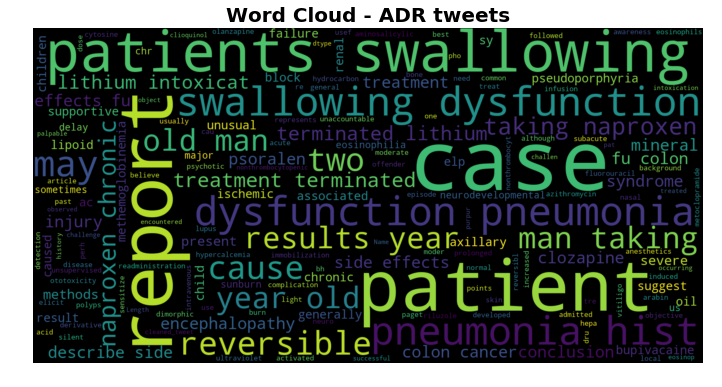

In [74]:
#Word cloud of ADR tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(df[df['ADR_label']==1]['cleaned_tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - ADR(Adverse Drug Reactions) tweets',fontsize=20,fontweight='bold')
plt.show()

In Adverse Drug Reactions Word cloud some word are being highlighted which are as: Swallowing, Dyssfunction, Mineral, traetment, pneumonia, naproxen, chronic, lithium, intoxicat, naproxen, side effect, clozapin, encephalopathy, hist etc.

In [21]:
#Defining x and y
X = df['cleaned_tweet']
y = df['ADR_label']


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

ctv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}',ngram_range=(1,3), stop_words='english')

ctv.fit(list(X_train)+list(X_test))
xtrain_ctv = ctv.transform(X_train)
xtest_ctv = ctv.transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegression

lf = LogisticRegression()
lf.fit(xtrain_ctv, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
predict = lf.predict(xtest_ctv)

In [56]:
predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
len(predict)

7055

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

In [58]:
confusion_matrix(y_test,predict)

array([[4752,  228],
       [ 519, 1556]], dtype=int64)

In [59]:
accuracy_score(y_test,predict)

0.8941176470588236

Accuracy of fitted model is 89.41%

In [60]:
precision_score(y_test,predict)

0.8721973094170403

In [61]:
recall_score(y_test,predict)

0.7498795180722891

In [62]:
f1_score(y_test,predict)

0.806426535371858